# ch04. Learning Neural Network(신경망 학습)
 - 학습 : 데이터로부터 가중치 매개변수의 최적의 값을 자동으로 획득
 - CostFunction
 - Gradient Descent 

## 4.1 데이터에서 학습
### 4.1.1 데이터 주도 학습
 - 패턴을 발견하고 데이터로 이야기를 만든다. 
 - 이미지에서 $Feature$를 추출하고 그 특징(feature)의 패턴을 기계학습 기술로 학습하는 방법. 
 - Feature : 입력 데이터(이미지)에서 본질적인 데이터(중요데이터)를 정확하게 추출할 수 있도록 설계된 변환기 
 - 보통 벡터로 기술, Computer Vision에서는 SIFT, SURF, HOG 등을 많이 사용. 

In [1]:
from IPython.display import Image

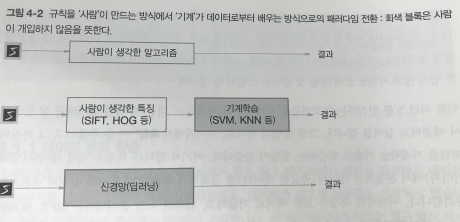

In [2]:
Image(filename="img/13.PNG", width = 500)

### 4.1.2 Training Data, Test Data 
 - Overfitting, Generalization 

## 4.2 손실함수(Cost Function)
 - 하나의 지표를 기준으로 최적의 매겨변수 값을 탐색 
 - 지표 : 손실함수 (Loss function)

### 4.2.1 평균 제곱 오차 (MSE)
 - $Mean$ $Square$ $error$, $MSE$ : 평균 제곱 오차 
 - $E = 1/2{\sum(y_k-t_k)^2}$
 - $y_k$ : 신경망의 출력(신경망에서 추정한 값) 
 - $t_k$ : 정답 레이블 
 - $k$ : 차원의 수 

3.6 손글씨 숫자 인식에서는 $y_k$와 $t_k$는 원소 10개짜리 데이터 

In [6]:
import numpy as np 

In [3]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

In [4]:
y # softmax에서 argmax로 출력하면 2번째 index값이 출력 답: 2

[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [5]:
t # 정답 2

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [7]:
np.argmax(y)

2

In [8]:
np.argmax(t)

2

In [9]:
def mean_square_error(y,t):
    return 0.5 * np.sum((y-t)**2)

#### example 1

In [11]:
mean_square_error(np.array(y),np.array(t))

0.097500000000000031

#### example 2

In [12]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [16]:
np.argmax(y)

7

In [15]:
mean_square_error(np.array(y),np.array(t)) # Error 값이 상승한다. 

0.59750000000000003

### 4.2.2 교차 엔트로피 오차 
 - $Cross$ $Entropy$ $error$, $CEE$도 자주 이용한다. 
 - $E = - \sum_k{t_klogy_k}$ (자연로그 e가 밑인 $Log$)
 - 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 
 - 실질적으로 정답일 때의 추정($t_k$가 1일때의 $y_k$)의 자연로그를 계산하는 식 

In [17]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

 - np.log를 계산할때 약간의 delta값을 넣어주는데 log(0)은 마이너스 무한대로 가기 때문에 약값의 값을 더해준다. 
 - 정답 2 

#### example 1

In [18]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [20]:
np.argmax(y)

2

In [21]:
np.log(np.array(y) + 1e-7)

array([ -2.30258409,  -2.99573027,  -0.51082546, -16.11809565,
        -2.99573027,  -2.30258409, -16.11809565,  -2.30258409,
       -16.11809565, -16.11809565])

In [23]:
t * np.log(np.array(y) + 1e-7)

array([-0.        , -0.        , -0.51082546, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [25]:
- np.sum(t * np.log(np.array(y) + 1e-7))

0.51082545709933802

In [19]:
cross_entropy_error(np.array(y),np.array(t))

0.51082545709933802

#### example 2

In [26]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [27]:
np.argmax(y)

7

In [28]:
np.log(np.array(y) + 1e-7)

array([ -2.30258409,  -2.99573027,  -2.30258409, -16.11809565,
        -2.99573027,  -2.30258409, -16.11809565,  -0.51082546,
       -16.11809565, -16.11809565])

In [29]:
t * np.log(np.array(y) + 1e-7)

array([-0.        , -0.        , -2.30258409, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [30]:
- np.sum(t * np.log(np.array(y) + 1e-7))

2.3025840929945458

In [31]:
cross_entropy_error(np.array(y),np.array(t))

2.3025840929945458

### 4.2.3 미니배치 학습 
 - 기계학습 문제는 훈련 데이터를 사용해 학습.
 - 훈련데이터를 통해 Loss Function 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 구한다. 
 - 지금까지 하나의 데이터로만 손실 함수만 생각했으니, 모든 데이터에대해서 생각해본다. 
 
$E=-1/N\sum_n\sum_kt_{nk}logy_{nk}$
 - 데이터가 N개 라면 $t_{nk}$는 n번째 데이터의 k번째의 값을 의미한다. 
 - 빅데이터의 경우 전체 다 구할려면 오랜 시간이 걸린다. 데이터 일부를 추려서 전체의 근사치로 이용한다. 
 - 이를 미니배치(mini-batch) 

In [32]:
import numpy as np
from dataset.mnist import load_mnist

In [33]:
(x_train, t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

In [34]:
x_train.shape

(60000, 784)

In [35]:
t_train.shape

(60000, 10)

In [36]:
t_train[0] # 정답 5

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

#### 무작위 초이스 

In [38]:
train_size,_= x_train.shape

In [39]:
train_size

60000

In [41]:
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)

In [43]:
batch_mask

array([14418,  5425, 32130, 22218, 37219, 28507, 36294,  8323,  2434, 19073])

In [42]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]